<a href="https://colab.research.google.com/github/DhannajayaPaliwal12/Dhananjaya_INFO5731_Fall2025/blob/main/Paliwal_Dhananjaya_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import pandas as pd
import nltk
from nltk import ngrams, word_tokenize, FreqDist
import spacy
from collections import Counter, defaultdict
import re
import spacy
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.float_format", "{:.6f}".format)


imdb_data = pd.read_csv('imdb_reviews.csv')

def tokenize(text):
    # Lowercase, remove punctuation except internal apostrophes
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s']", ' ', text)
    tokens = [tok for tok in text.split() if tok.strip() != ""]
    return tokens

# N-gram frequency counts for N=2, N=3
def get_ngram_freqs(texts, n):
    counts = defaultdict(int)
    for text in texts:
        tokens = tokenize(text)
        for i in range(len(tokens) - n + 1):
            ngram = tuple(tokens[i:i+n])
            counts[ngram] += 1
    return counts

bigram_freq = get_ngram_freqs(imdb_data['text'], 2)
trigram_freq = get_ngram_freqs(imdb_data['text'], 3)

print("Top bigrams:", sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top trigrams:", sorted(trigram_freq.items(), key=lambda x: x[1], reverse=True)[:10])

# Bigram probabilities P(w2 | w1) = count(w1,w2)/count(w1)
def unigram_counts(texts):
    uni = defaultdict(int)
    for text in texts:
        tokens = tokenize(text)
        for t in tokens:
            uni[t] += 1
    return uni

unigrams = unigram_counts(imdb_data['text'])
bigram_probs = {}
for (w1, w2), c in bigram_freq.items():
    if unigrams[w1] > 0:
        bigram_probs[(w1, w2)] = c / unigrams[w1]

print("\nSample bigram probabilities:")
for k, v in list(bigram_probs.items())[:10]:
    print(f"P({k[1]} | {k[0]}) = {v:.3f}")

# Extract noun phrases & compute relative probabilities

review_np_counts = []
all_np = set()

for text in imdb_data['text'].astype(str).tolist():
    doc = nlp(text)

    nps = [chunk.text.lower().strip() for chunk in doc.noun_chunks]

    count = Counter(nps)

    review_np_counts.append(count)

    all_np.update(count.keys())

# Compute max frequency across all reviews
max_np_freq = {np: max(c[np] for c in review_np_counts) for np in all_np}

# Compute relative probabilities for each review
rel_prob_rows = []
for count in review_np_counts:
    row = {}
    for np in all_np:
        maxf = max_np_freq[np]
        row[np] = (count[np] / maxf) if maxf > 0 else 0
    rel_prob_rows.append(row)

np_df = pd.DataFrame(rel_prob_rows)
np_df.index = [f"Review_{i+1}" for i in range(len(imdb_data))]

print("\nNoun Phrase Relative Probability Table:")
print(np_df.head())

Top bigrams: [(('of', 'the'), 1888), (('in', 'the'), 904), (('the', 'movie'), 755), (('and', 'the'), 748), (('the', 'film'), 745), (('this', 'movie'), 604), (('to', 'the'), 587), (('is', 'a'), 542), (('it', 'is'), 434), (('on', 'the'), 429)]
Top trigrams: [(('one', 'of', 'the'), 277), (('the', 'atomic', 'bomb'), 244), (('robert', 'downey', 'jr'), 198), (('j', 'robert', 'oppenheimer'), 163), (('of', 'the', 'atomic'), 151), (('of', 'the', 'film'), 150), (('this', 'movie', 'is'), 142), (('the', 'movie', 'is'), 127), (('the', 'manhattan', 'project'), 125), (('of', 'the', 'movie'), 123)]

Sample bigram probabilities:
P(have | you'll) = 0.059
P(to | have) = 0.070
P(have | to) = 0.012
P(your | have) = 0.005
P(wits | your) = 0.005
P(about | wits) = 1.000
P(you | about) = 0.002
P(and | you) = 0.008
P(your | and) = 0.000
P(brain | your) = 0.041

Noun Phrase Relative Probability Table:
          hiroshima  an epic achievement  imax cameras  projects  \
Review_1   0.000000             0.000000    

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [2]:
import math

# Tokenize all documents
tokenized_docs = [tokenize(doc) for doc in imdb_data['text']]

# Build vocabulary
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
N = len(tokenized_docs)

# Compute Term Frequency (TF)
tf = []  # list of dicts
for doc in tokenized_docs:
    counts = Counter(doc)
    total_terms = len(doc)
    tf.append({term: counts[term] / total_terms for term in vocab})

# Compute Document Frequency (DF) and IDF
dfreq = defaultdict(int)
for term in vocab:
    for doc in tokenized_docs:
        if term in doc:
            dfreq[term] += 1

idf = {term: math.log(N / (1 + dfreq[term])) for term in vocab}

# Compute TF-IDF matrix
tfidf = []
for doc_tf in tf:
    tfidf.append({term: doc_tf[term] * idf[term] for term in vocab})

tfidf_df = pd.DataFrame(tfidf, index=[f"Doc_{i+1}" for i in range(N)])

# Process a query
query = "An outstanding movie with a haunting performance and best character development"

q_tokens = tokenize(query)
q_counts = Counter(q_tokens)
q_total = len(q_tokens)

# TF and TF-IDF for query
q_tf = {term: q_counts[term] / q_total for term in vocab}
q_tfidf = {term: q_tf[term] * idf.get(term, 0) for term in vocab}

# Cosine Similarity function
def cosine_similarity(vec1, vec2):
    num = sum(vec1[t] * vec2[t] for t in vocab)
    denom1 = math.sqrt(sum(vec1[t] ** 2 for t in vocab))
    denom2 = math.sqrt(sum(vec2[t] ** 2 for t in vocab))
    if denom1 == 0 or denom2 == 0:
        return 0
    return num / (denom1 * denom2)

# Compute cosine similarities
sims = []
for i, doc_vec in enumerate(tfidf):
    sim = cosine_similarity(doc_vec, q_tfidf)
    sims.append((f"Doc_{i+1}", sim))

# Sort and show
ranked = sorted(sims, key=lambda x: x[1], reverse=True)
print("\nTop 10 Document Ranking by Cosine Similarity to Query:")

for idx, score in ranked[:10]:
    print(f"\nRank {ranked.index((idx, score)) + 1}: Similarity = {score:.4f}")
    review_text = str(imdb_data['text'].iloc[int(idx.split('_')[1])-1])
    review_text = re.sub(r'\s+', ' ', review_text).strip()
    print(f"Review Text:{review_text}")



Top 10 Document Ranking by Cosine Similarity to Query:

Rank 1: Similarity = 0.1337
Review Text:Movie was released on the 19th in my country. In my opinion, it is the most important film Nolan has ever made. I had goosebumps during THAT part in the middle of the movie and at the end. No viewing experience could have given me that suffocating and colossal feeling than in the cinema. The music score, the cinematography, the acting, everything about it is sublime. I sank in my seat and for a good 5 minutes after it ended, none of the people I watched it with made a move. We just kind of sat there in silence, at a loss for words. See this on the big screens. It's an incredible, haunting piece of art and cinema at its finest. Cillian Murphy, Robert Downey Jr., and Emily Blunt are outstanding in this. The cast was just stellar.

Rank 2: Similarity = 0.1332
Review Text:Best movie in my lifetime. All aspects were exemplary: the acting, the writing, the cinematography, ... I've never paid much

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the embeddings using PCA or t-SNE in 2D. Create a scatter plot of at least 20 words and show how similar words cluster together.

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Got embeddings for 11457 words


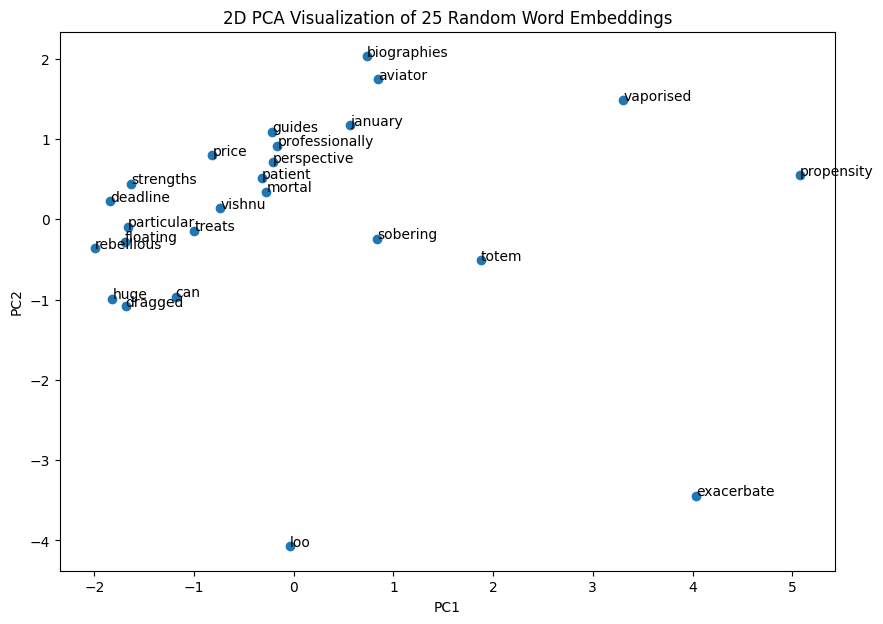


Cosine Similarities:
      good ~ great     : 0.875
     movie ~ film      : 0.911
      good ~ bad       : 0.881
    boring ~ exciting  : 0.867
     actor ~ actress   : 0.967


In [3]:
# Word Embeddings using BERT (Fine-tuned base model)
# !pip install transformers torch --quiet

import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import random

# Load pretrained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Get BERT embeddings for each target word
def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # outputs.last_hidden_state shape: [1, tokens, 768]
    # take mean of token embeddings (some words split into subwords)
    emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return emb

word_vecs = {w: get_word_embedding(w) for w in vocab}
print("Got embeddings for", len(word_vecs), "words")

# Reduce to 2D for visualization
selected_words = random.sample(list(word_vecs.keys()), 25)
emb_matrix = np.vstack([word_vecs[w] for w in selected_words])

pca = PCA(n_components=2)
coords = pca.fit_transform(emb_matrix)

plt.figure(figsize=(10,7))
plt.scatter(coords[:,0], coords[:,1])
for i, w in enumerate(selected_words):
    plt.annotate(w, (coords[i,0], coords[i,1]))
plt.title(f"2D PCA Visualization of {25} Random Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Cosine similarity between word pairs
pairs = [
    ('good', 'great'),
    ('movie', 'film'),
    ('good', 'bad'),
    ('boring', 'exciting'),
    ('actor', 'actress'),
]

print("\nCosine Similarities:")
for w1, w2 in pairs:
    v1, v2 = word_vecs[w1], word_vecs[w2]
    sim = cosine_similarity([v1], [v2])[0][0]
    print(f"{w1:>10s} ~ {w2:<10s}: {sim:.3f}")


## Question 4 (20 Points)

**Create your own training and evaluation dataset for an NLP task.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



## Github Link for file with annoted imdb movie reviews :
https://github.com/DhannajayaPaliwal12/Dhananjaya_INFO5731_Fall2025/blob/main/imdb_reviews_annotated.csv





**1. Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)**

**Ans.** The goal of the NLP task will be to automatically classify each movie review into one of three sentiment categories — Positive, Negative, or Neutral — based on the emotional tone and opinion expressed in the text.

It is a classic supervised text classification problem that uses labeled data to train a model to predict sentiment for new, unseen reviews.

**2.  Explain your labeling Schema you have used and mention those labels**

**Ans.** Each review in the IMDB dataset was annotated with a single sentiment label according to the main opinion or tone conveyed in the text. The labeling followed a three-class schema:

Label	Description:

Positive:	The review expresses a favorable opinion, praise, or strong satisfaction with the movie.

Negative: The review expresses dissatisfaction, criticism, or dislike toward the movie.

Neutral:	The review is factual, balanced, or contains both positive and negative aspects without a strong emotional stance.





# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Overall, this assignment was an engaging experience. Working through tasks such as word embeddings, TF-IDF and POS tagging a deeper understanding of how these individual concepts connect to form a complete NLP pipeline.

**Challenging Part:**
The most demanding part for me was handling the data annotation for the sentiment analysis task. Going through hundreds of reviews and assigning accurate labels required patience and careful reading to ensure consistency. Along with this, it was also slightly tricky to decide how to categorize mixed or neutral reviews, as some texts expressed both positive and negative emotions.

**Enjoyable Aspects:**
I particularly enjoyed visualizing the embeddings (using PCA) and analyzing how similar words clustered together. It was fascinating to see how mathematics and language intersect to reveal meaningful patterns in textual data.

**Provided Time:**
The given time was generally sufficient for the coding and conceptual parts of the assignment. However, the manual labeling process was quite time-intensive. A bit of extra time for data annotation would make the workflow smoother, especially for those working with larger datasets.